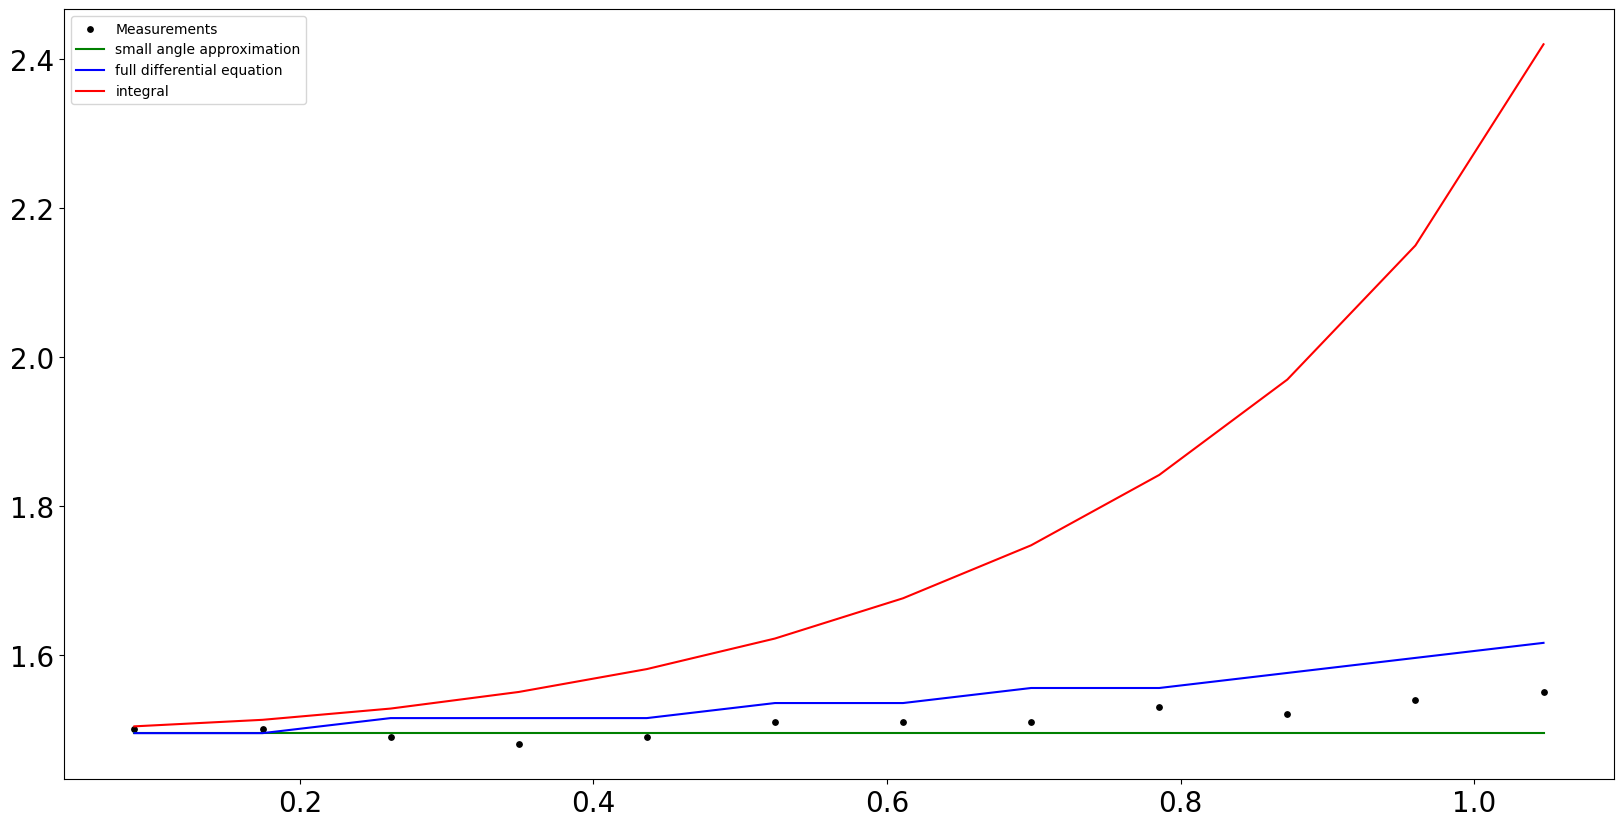

In [30]:
# imports
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# read in data
data = np.genfromtxt("pendulum.txt", skip_header=1)

drop_angle = data[:,0] * 2 * np.pi / 360 # radians
period_l1 = data[:,4]
period_l2 = data[:,9]



# define constants
g = 9.81
l1 = 0.56 # meters instead of cm
l2 = 0.32

time_axis = np.linspace(0, 10, 100) #0.1s increments - I might make the increments smaller for the final graphs (at least 30fps to match the video quality)



# small angle approximation model
def SAA_model(x, t, length):
    theta, v = x
    dthetadt = v
    dvdt = -(g/length) * theta
    return[dthetadt,dvdt]

# full differential equation model
def FDE_model(x, t, length):
    theta, v = x
    dthetadt = v                       # v is omega
    dvdt = -(g/length) * np.sin(theta)
    return[dthetadt,dvdt]

# integral equation model
def integrand(phi, theta0):
    return (1 - np.sin((theta0)**2) * np.sin(phi)**2)**(-0.5)



length = l1 # l1 math
theta_SAA_l1 = np.zeros(12, dtype=object)
omega_SAA_l1 = np.zeros(12, dtype=object) # not sure we need these omega values
T_SAA_l1 = np.zeros(12, dtype=object)

theta_FDE_l1 = np.zeros(12, dtype=object)
omega_FDE_l1 = np.zeros(12, dtype=object)
T_FDE_l1 = np.zeros(12, dtype=object)

T_integral_l1 = np.zeros(12, dtype=object)

for i in range(0, 12):
    x0 = [drop_angle[i], 0.0]
    theta0 = drop_angle[i]

    theta_SAA_l1[i], omega_SAA_l1[i] = odeint(SAA_model, x0, time_axis, args=(length,)).T
    theta_FDE_l1[i], omega_FDE_l1[i] = odeint(FDE_model, x0, time_axis, args=(length,)).T  

    T_SAA_l1[i] = time_axis[find_peaks(theta_SAA_l1[i])[0][4]] / 5 # average period over five peaks
    T_FDE_l1[i] = time_axis[find_peaks(theta_FDE_l1[i])[0][4]] / 5

    T_integral_l1[i] = 4 * (l1/g)**0.5 * quad(integrand, 0, np.pi/2, args=(theta0,))[0]


length = l2 # l2 math
theta_SAA_l2 = np.zeros(12, dtype=object)
omega_SAA_l2 = np.zeros(12, dtype=object)
T_SAA_l2 = np.zeros(12, dtype=object)

theta_FDE_l2 = np.zeros(12, dtype=object)
omega_FDE_l2 = np.zeros(12, dtype=object)
T_FDE_l2 = np.zeros(12, dtype=object)

T_integral_l2 = np.zeros(12, dtype=object)

for i in range(0, 12):
    x0 = [drop_angle[i], 0.0]
    theta0 = drop_angle[i]

    theta_SAA_l2[i], omega_SAA_l2[i] = odeint(SAA_model, x0, time_axis, args=(length,)).T
    theta_FDE_l2[i], omega_FDE_l2[i] = odeint(FDE_model, x0, time_axis, args=(length,)).T

    T_SAA_l2[i] = time_axis[find_peaks(theta_SAA_l2[i])[0][4]] / 5
    T_FDE_l2[i] = time_axis[find_peaks(theta_FDE_l2[i])[0][4]] / 5

    T_integral_l2[i] = 4 * (l2/g)**0.5 * quad(integrand, 0, np.pi/2, args=(theta0,))[0]



# plotting
fig1 = plt.figure(figsize=(20,10)) # l1 figure
ax1 = fig1.add_subplot(111)
ax1.scatter(drop_angle, period_l1, s=15, c='k', label="Measurements")
ax1.plot(drop_angle, T_SAA_l1, c='g', label="small angle approximation")
ax1.plot(drop_angle, T_FDE_l1, c='b', label="full differential equation")
ax1.plot(drop_angle, T_integral_l1, c='r', label="integral")

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.legend()